In [68]:
import pandas as pd 
import numpy as np
import os
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN


In [69]:
dataset = pd.read_csv(r"C:\\Users\\Adith\\Desktop\\Data Science_Excel R\\home assignments\\clustering\\EastWestAirlines.csv",encoding ='utf-8')

In [70]:
dataset

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [71]:
#checking with information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [72]:
#checking for any null values 
dataset.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [73]:
#checking shape of our data
dataset.shape

(3999, 12)

# EDA and Visualization


In [74]:
dataset2 = dataset.rename({"Award?":"Award"},axis = 1)
dataset2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


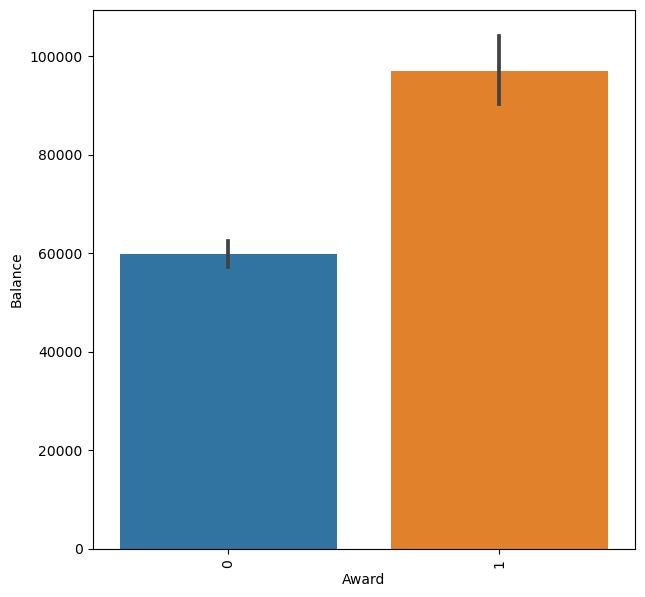

In [75]:
#plotting with balance and award 
plt.figure(figsize=(7,7))
Balance = dataset2[['Award','Balance']].sort_values ('Balance',ascending = False)
ax =  sn.barplot(x = 'Award',y = 'Balance',data = Balance)
ax.set(xlabel = 'Award',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()



In [76]:
#checking for correlation with balance 
corr_matrix =  dataset2.corr()
corr_matrix["Balance"].sort_values(ascending = False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID#                 -0.243737
Name: Balance, dtype: float64

<AxesSubplot:>

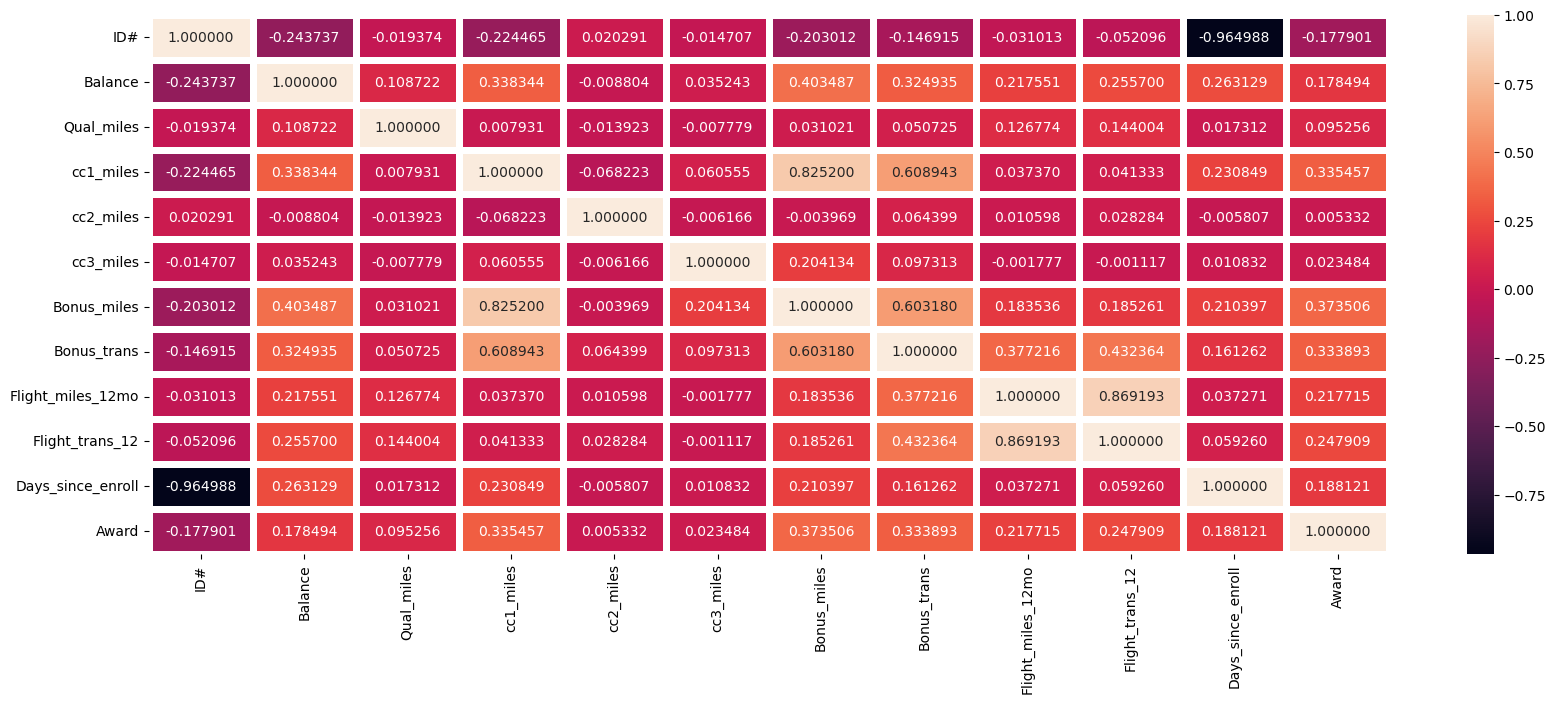

In [77]:
#correlation heatmap 
f,ax = plt.subplots(figsize = (20,7))
sn.heatmap(dataset2.corr(),annot = True, linewidths =5 ,fmt ='1f',ax = ax)

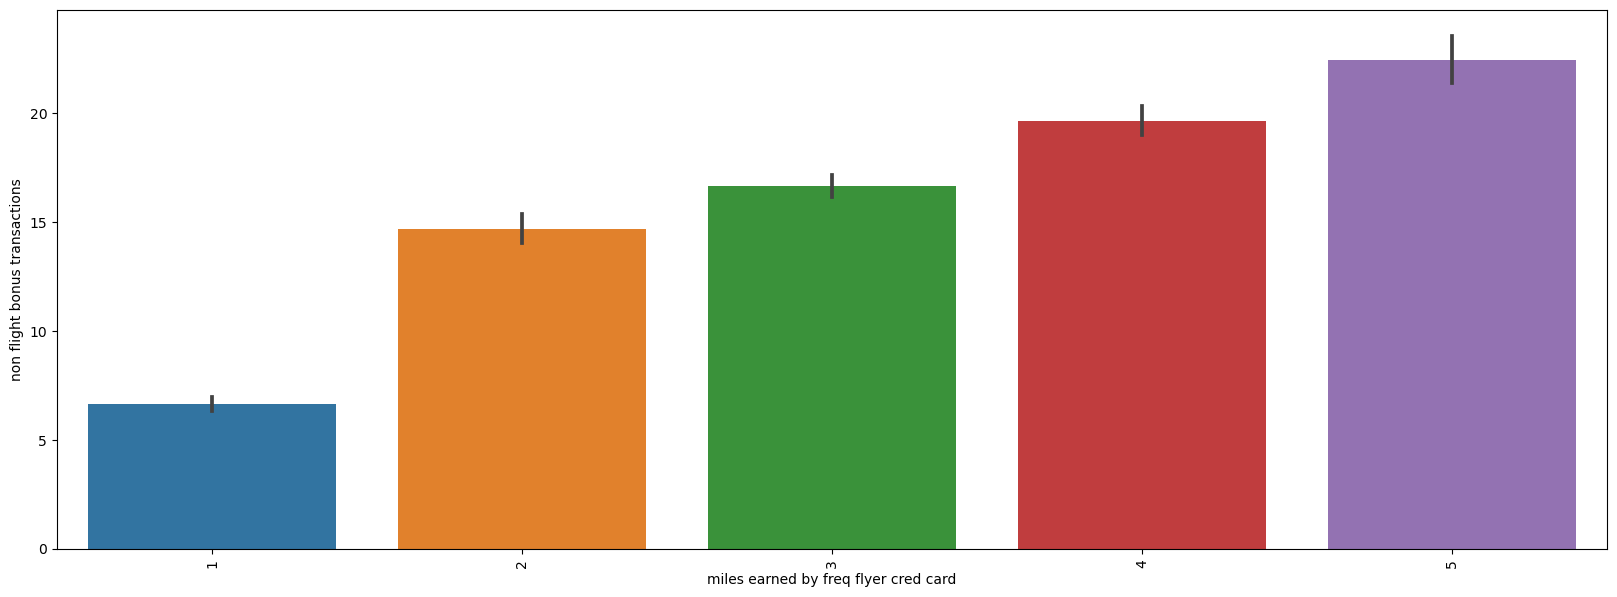

In [78]:
#plotting for frequent flying bonuses vs non flight bonus transactions

plt.figure(figsize=(20,7))
sorted_data = dataset2[['cc1_miles','Bonus_trans']].sort_values ('Bonus_trans',ascending = False)
ax =  sn.barplot(x = 'cc1_miles',y = 'Bonus_trans',data = sorted_data)
ax.set(xlabel = 'miles earned by freq flyer cred card',ylabel = 'non flight bonus transactions')
plt.xticks(rotation = 90)
plt.show()



In [79]:
#people who travel grequently use bonus transactions more 

ID#


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


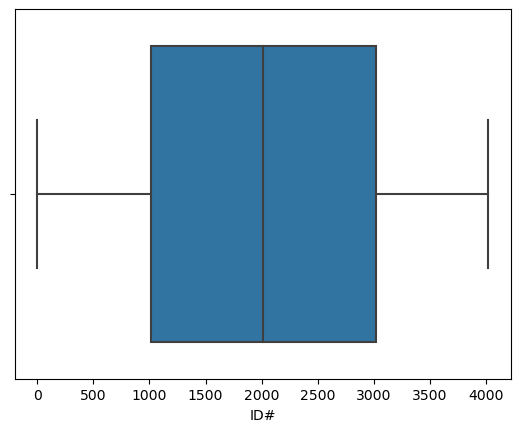

Balance


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


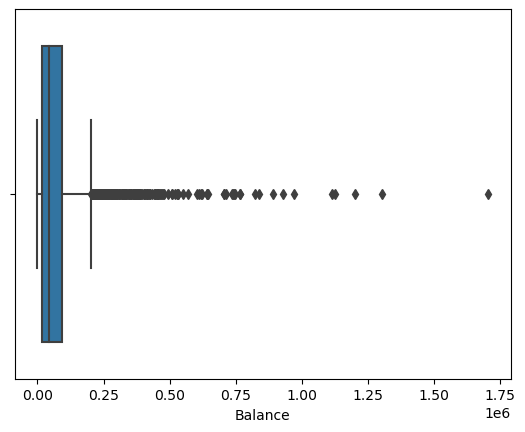

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Qual_miles


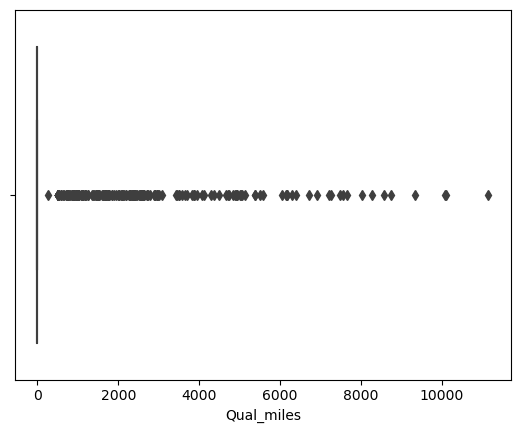

cc1_miles


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


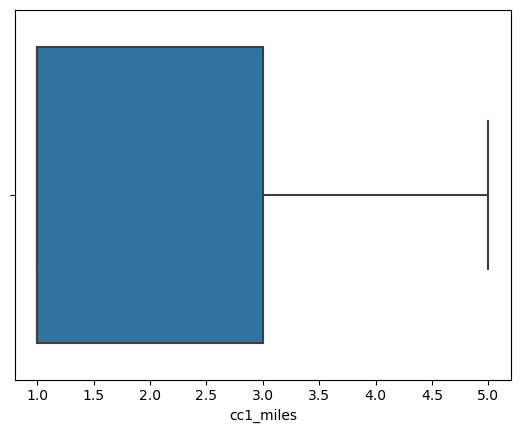

cc2_miles


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


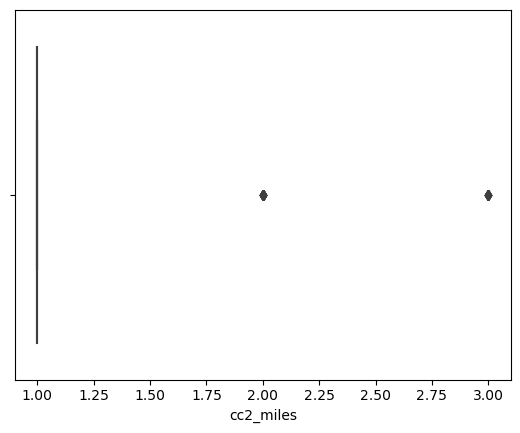

cc3_miles


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


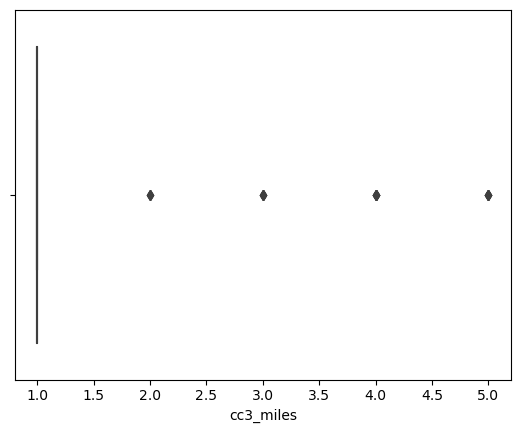

Bonus_miles


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


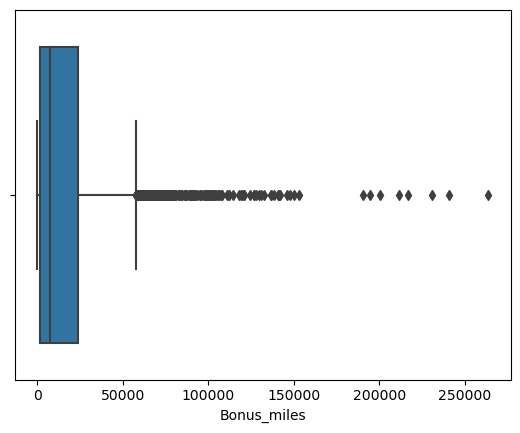

Bonus_trans


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


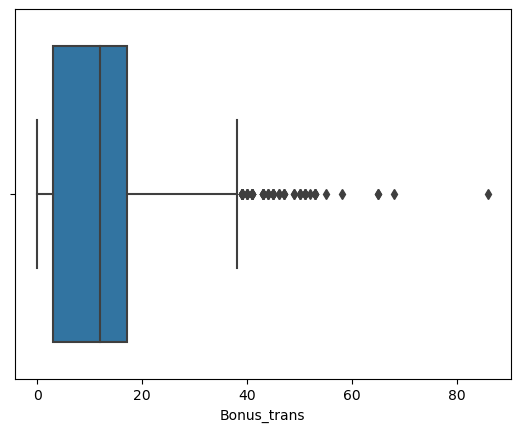

Flight_miles_12mo


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


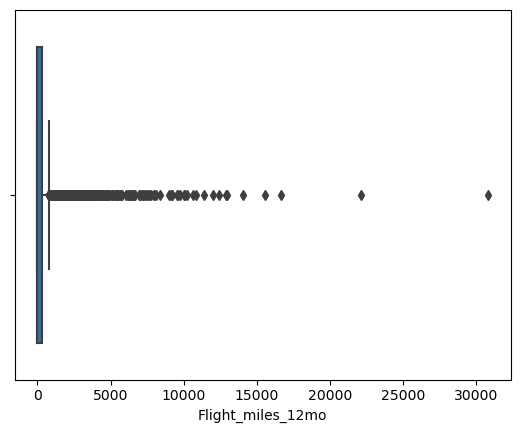

Flight_trans_12


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


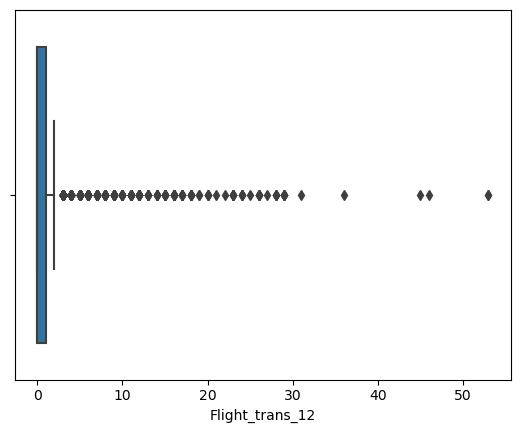

Days_since_enroll


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


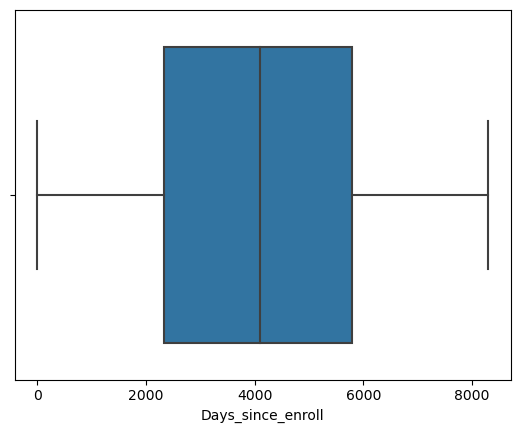

Award


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


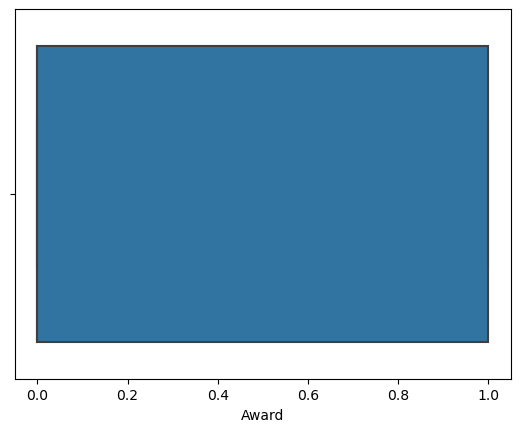

In [80]:
#checking for outlier using boxplot 
for n in dataset2.columns:
    print(n)
    sn.boxplot(dataset2[n])
    plt.show()

# Outlier Analysis

<AxesSubplot:>

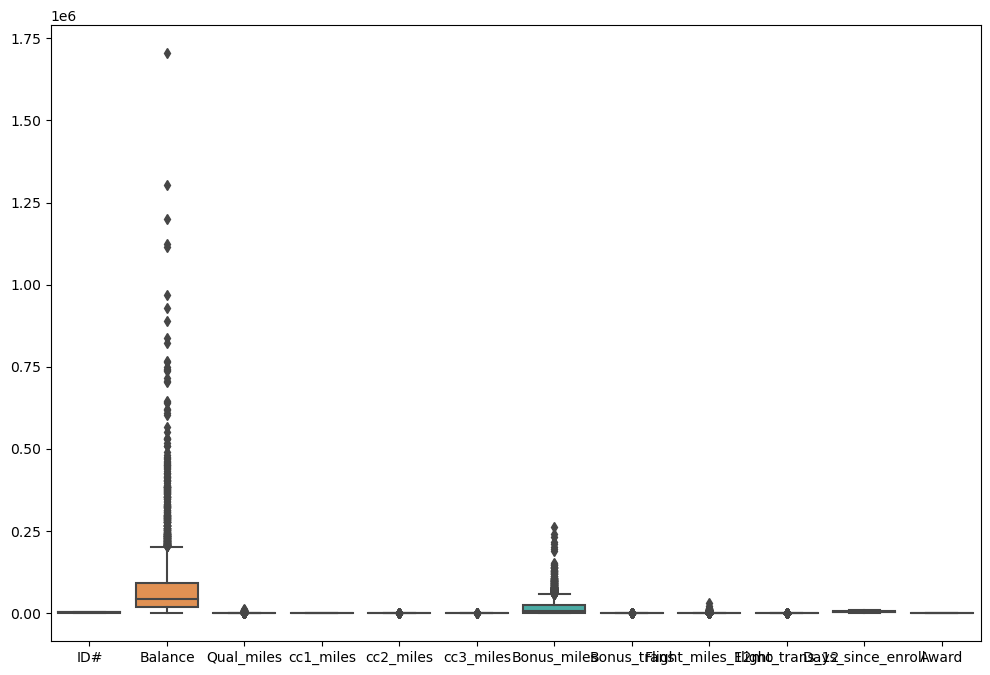

In [81]:
plt.figure(figsize=(12,8))
sn.boxplot(data= dataset2)

In [82]:
#as we can see outliers in balance , eliminating outliers from balance 
q1 = dataset2['Balance'].quantile(0.25)
q3 = dataset2['Balance'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
dataset3 = dataset2[(dataset2['Balance']>lq1)&(dataset2['Balance']<uq1)]

dataset3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

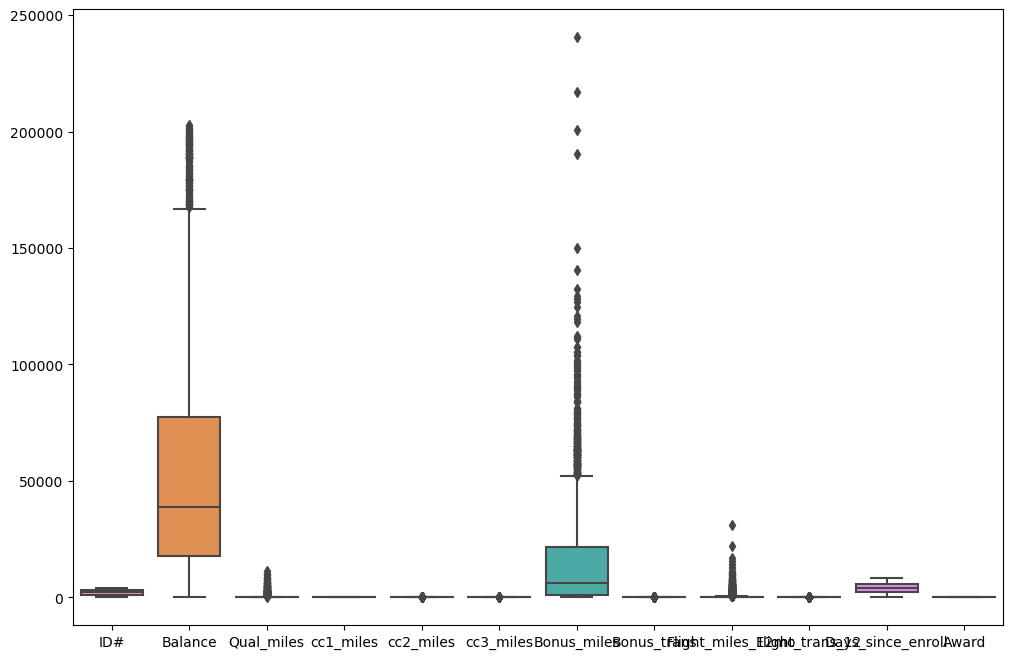

In [83]:
#visualizing again to check for outliers 
plt.figure(figsize=(12,8))
sn.boxplot(data= dataset3)

In [84]:
#shape of our new dataframe
dataset3.shape

(3733, 12)

In [85]:
#removing outlier from Bonus miles 
#as we can see outliers in bonus miles , eliminating outliers from bonus miles
q1 = dataset3['Bonus_miles'].quantile(0.25)
q3 = dataset3['Bonus_miles'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
dataset4 = dataset3[(dataset3['Bonus_miles']>lq1)&(dataset3['Bonus_miles']<uq1)]

dataset4.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

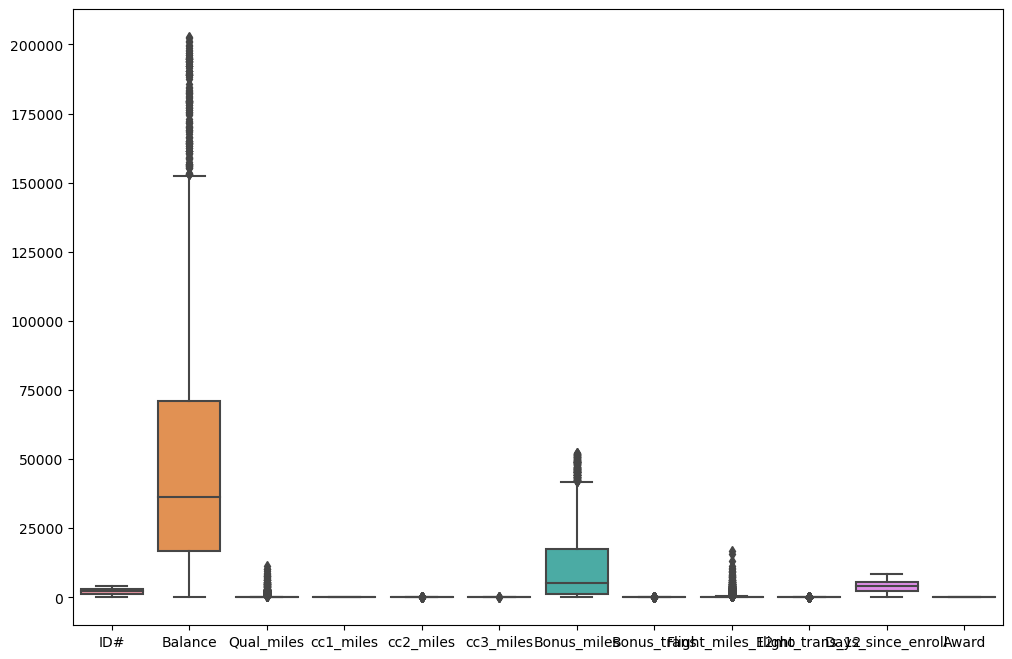

In [86]:
#visualizing again to check for outliers 
plt.figure(figsize=(12,8))
sn.boxplot(data= dataset4)

In [87]:

#removing outlier from flight miles 
#as we can see outliers in flight miles , eliminating outliers 
q1 = dataset4['Flight_miles_12mo'].quantile(0.25)
q3 = dataset4['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
dataset5 = dataset4[(dataset4['Flight_miles_12mo']>lq1)&(dataset4['Flight_miles_12mo']<uq1)]

dataset5.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


<AxesSubplot:>

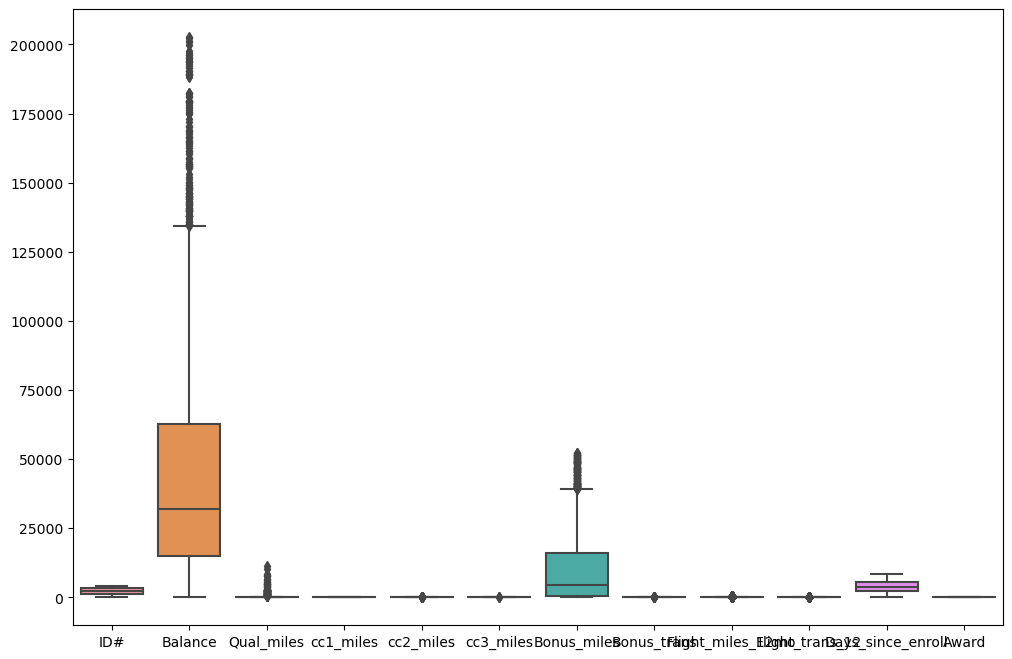

In [88]:
#visualizing again to check for outliers 
plt.figure(figsize=(12,8))
sn.boxplot(data= dataset5)

In [89]:

#removing outlier from Qual miles 
#as we can see outliers in Qual miles , eliminating outliers 
q1 = dataset5['Qual_miles'].quantile(0.25)
q3 = dataset5['Qual_miles'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
dataset6 = dataset5[(dataset5['Qual_miles']>lq1)&(dataset5['Qual_miles']<uq1)]

dataset6.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


<AxesSubplot:>

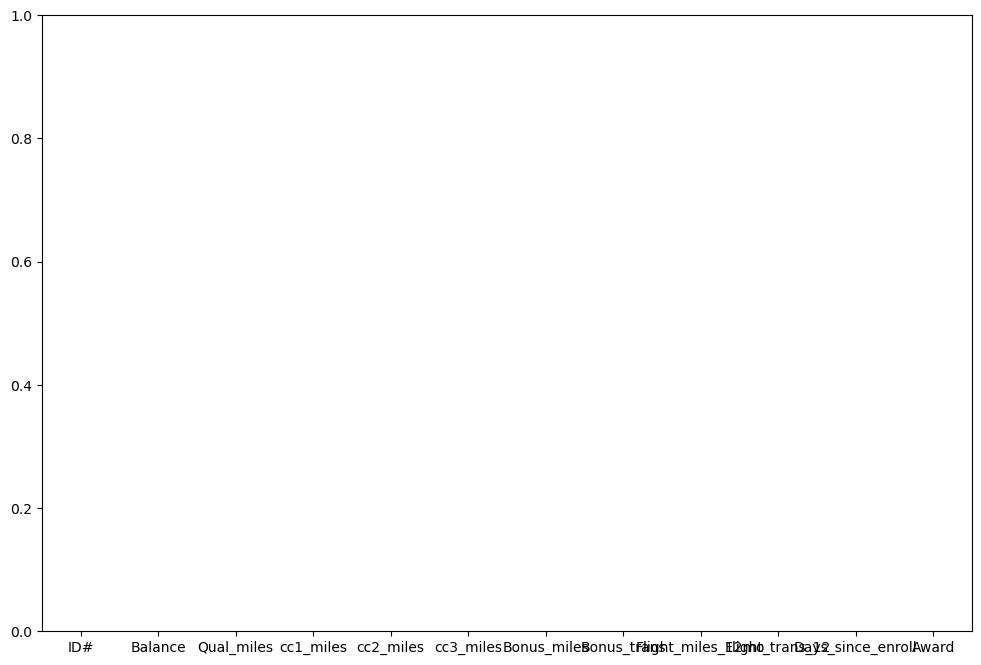

In [90]:
#visualizing again to check for outliers 
plt.figure(figsize=(12,8))
sn.boxplot(data= dataset6)

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Qual_miles'>

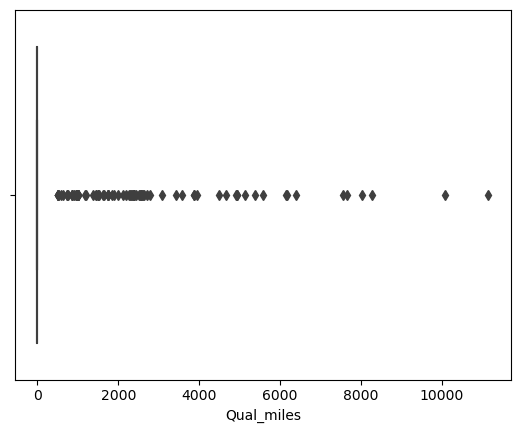

In [91]:
#since we arent able to see any data that means the qual miles had too many which are important 
#so we continue with dataset5
sn.boxplot(dataset5['Qual_miles'])


# Finalizing our Dataset 5 

In [92]:
dataset5.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


In [93]:
#since we know ID and award will not make much contribution while clustering so we will drop columns
dataset7 = dataset5.drop(['ID#'],axis = 1)
dataset7

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1


<AxesSubplot:>

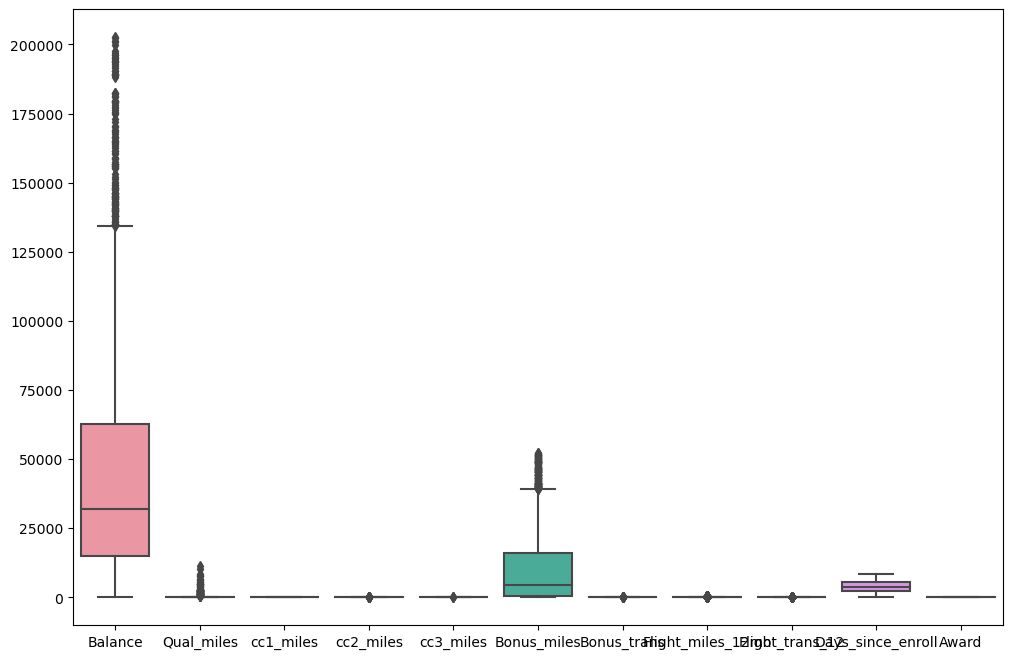

In [94]:
#final boxplot graph with our dataset 
plt.figure(figsize=(12,8))
sn.boxplot(data= dataset7)

In [95]:
# Normalizing our data for Kmeans 
standard_scaler = StandardScaler()
dataset_norm = standard_scaler.fit_transform(dataset7)
dataset_norm.shape

(2763, 11)

# KMeans 


In [96]:
#elbow method for determining the K value 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(dataset_norm)
    wcss.append(kmeans.inertia_)


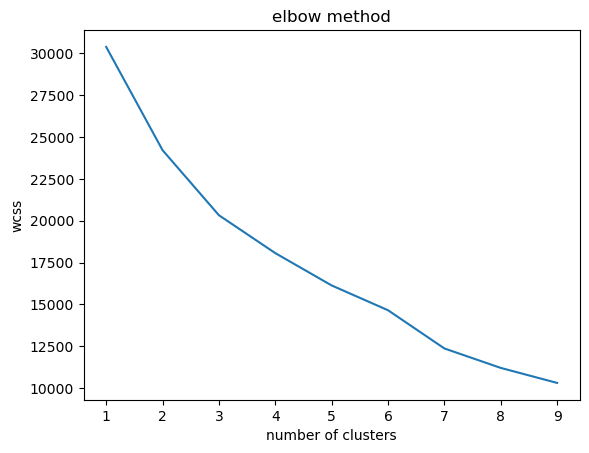

In [97]:
#plotting the slbow graph 
plt.plot(range(1,10),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [98]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
# Generating the sample data from make_blobs

X, Y = make_blobs()

no_of_clusters = [2, 3, 4, 5, 6]

for n_clusters in no_of_clusters:

	cluster = KMeans(n_clusters = n_clusters)
	cluster_labels = cluster.fit_predict(X)

	# The silhouette_score gives the
	# average value for all the samples.
	silhouette_avg = silhouette_score(X, cluster_labels)

	print("For no of clusters =", n_clusters,
		" The average silhouette_score is :", silhouette_avg)


For no of clusters = 2  The average silhouette_score is : 0.5062413363302377
For no of clusters = 3  The average silhouette_score is : 0.4794729967779532
For no of clusters = 4  The average silhouette_score is : 0.4372873260801587
For no of clusters = 5  The average silhouette_score is : 0.33429826802039486
For no of clusters = 6  The average silhouette_score is : 0.3510473865739556


In [99]:
#since we are looking for a generalized model for clustering we go with K value 4
clusters_new = KMeans(4, random_state= 100)
clusters_new.fit(dataset_norm)


KMeans(n_clusters=4, random_state=100)

In [100]:
clusters_new.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [101]:
#assigning cluster labels to our dataset 
dataset7['clusterid_new'] = clusters_new.labels_
dataset7.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0


In [102]:
#computing the centroids and their values 

clusters_new.cluster_centers_

array([[-4.01155256e-01, -3.21275077e-02, -6.36625596e-01,
        -9.87484622e-02, -2.86920718e-02, -5.92827326e-01,
        -4.99477477e-01, -2.78054421e-01, -2.65789448e-01,
        -1.70617577e-01, -2.99684639e-01],
       [ 6.65233455e-01,  3.29940475e-02,  1.18506943e+00,
        -9.87484622e-02,  6.11902348e-02,  1.06901587e+00,
         8.66184510e-01, -2.59237887e-01, -2.27676699e-01,
         2.96509493e-01,  4.63434726e-01],
       [-1.01127964e-01, -1.36101766e-01, -6.97999317e-01,
         8.99598491e+00, -2.86920718e-02,  7.51941879e-02,
         5.54627146e-01,  9.26360365e-02,  8.79543143e-02,
         6.26963572e-03, -8.33623730e-02],
       [ 3.24124700e-01,  1.25179888e-01,  6.70397885e-02,
        -9.87484622e-02, -2.86920718e-02,  1.02129568e-01,
         1.57688086e-01,  3.10344087e+00,  2.88557351e+00,
         7.64311622e-02,  3.78250112e-01]])

In [103]:
#calculating aggregate mean by grouping 
dataset7.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,28350.799510,63.652974,1.066830,1.000000,1.000000,2611.096873,5.311465,0.694053,0.011649,3552.870018,0.137339
1,1,72629.667044,103.339751,3.066818,1.000000,1.005663,23625.590034,16.124575,1.925255,0.028313,4517.414496,0.475651
2,2,40830.500000,0.000000,1.000000,2.366667,1.000000,11067.233333,13.666667,25.000000,0.166667,3918.366667,0.233333
3,3,58463.406393,159.858447,1.840183,1.000000,1.000000,11407.981735,10.520548,222.420091,1.392694,4062.529680,0.438356


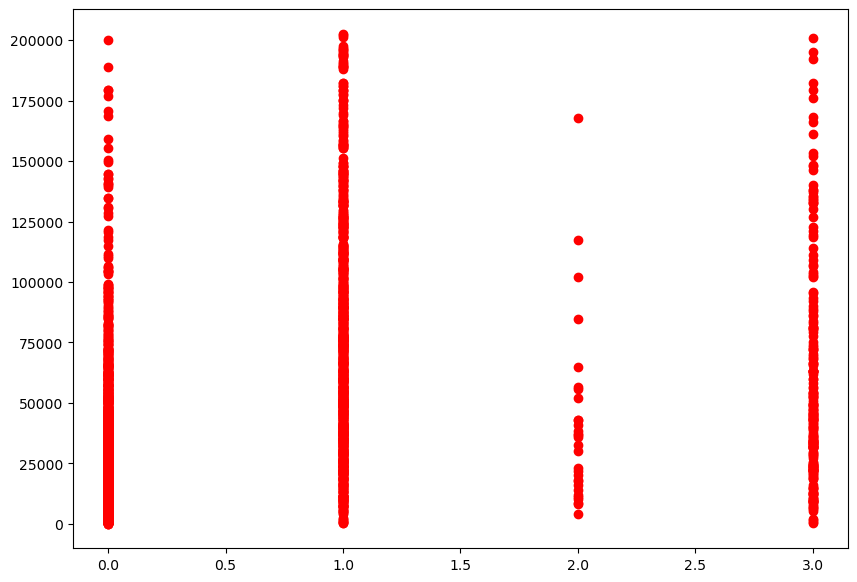

In [104]:
#plotting clusters 
plt.figure(figsize=(10,7))
plt.scatter(dataset7['clusterid_new'],dataset7['Balance'],c = 'red')

In [105]:
# total number of frquent flyers with frequent flyer credit card
dataset7[dataset7['clusterid_new']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
6,84914,0,3,1,1,27482,25,0,0,6994,0,1
12,43382,0,2,1,1,11150,20,0,0,6924,0,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,51890,0,4,1,1,48963,16,0,0,6910,1,1
18,91473,0,3,1,1,27408,17,0,0,6903,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,10071,0,2,1,1,27701,16,0,0,1421,1,1
3980,28867,0,3,1,1,19169,28,0,0,1425,0,1
3985,59017,0,4,1,1,34746,25,0,0,1418,0,1
3991,39142,0,3,1,1,14981,28,0,0,1408,0,1


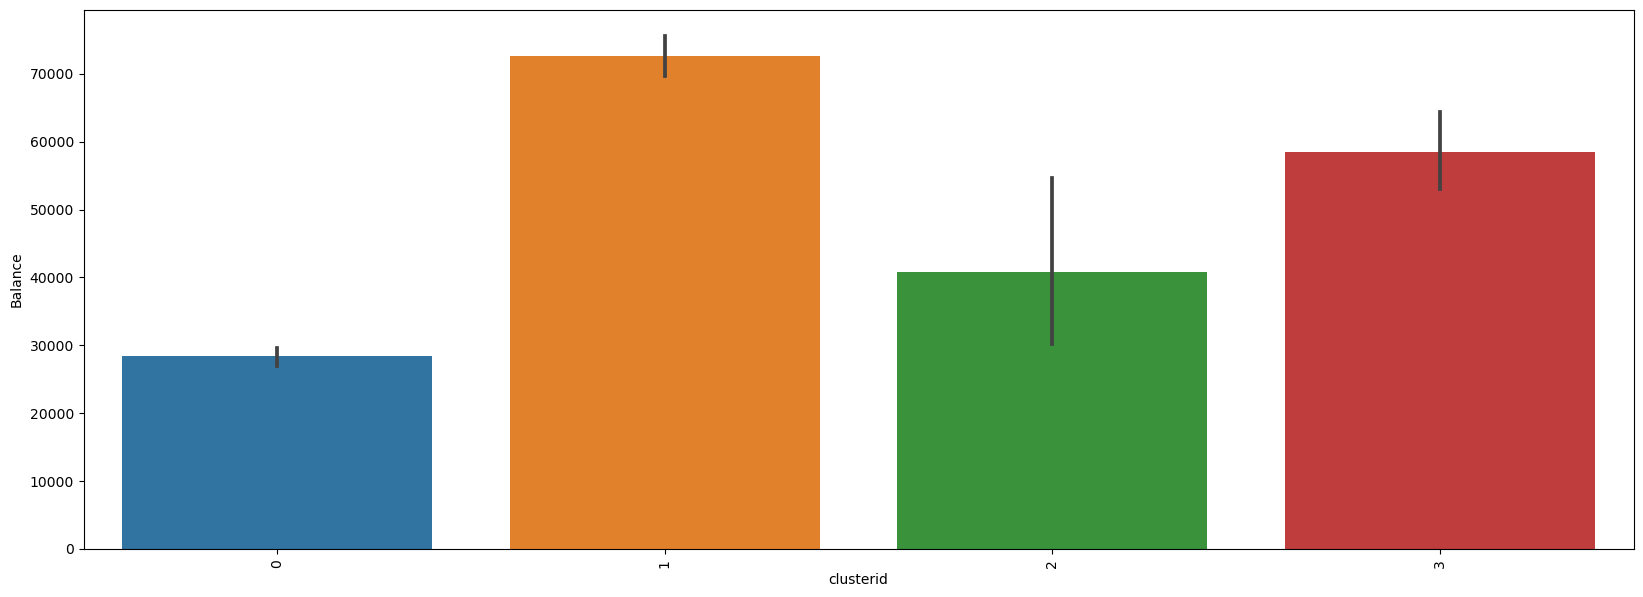

In [106]:
#plotting with no of miles eligible for free flight and clusterid 
plt.figure(figsize=(20,7))
Balance = dataset7[['clusterid_new','Balance']].sort_values ('Balance',ascending = False)
ax =  sn.barplot(x = 'clusterid_new',y = 'Balance',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()



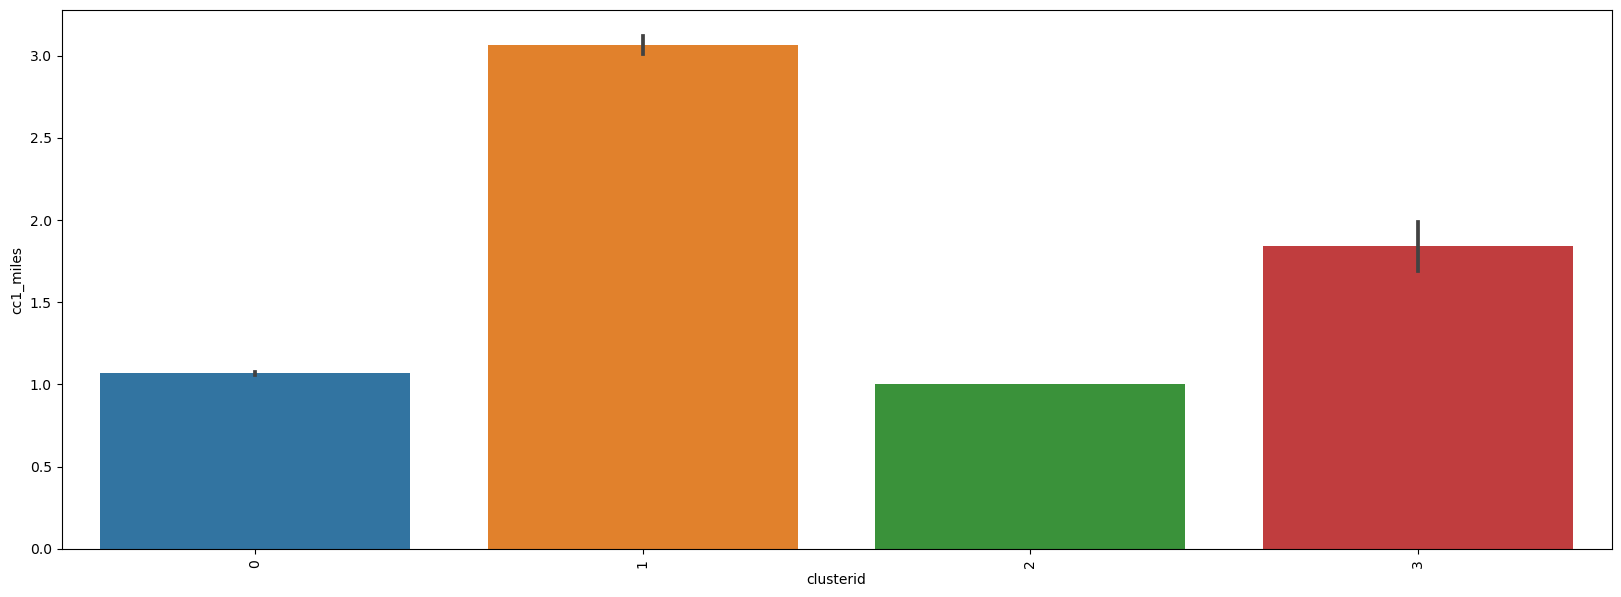

In [107]:
#plotting with frequent flyer with flyer cred card and clusterid 
plt.figure(figsize=(20,7))
Balance = dataset7[['clusterid_new','cc1_miles']].sort_values ('cc1_miles',ascending = False)
ax =  sn.barplot(x = 'clusterid_new',y = 'cc1_miles',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'cc1_miles')
plt.xticks(rotation = 90)
plt.show()



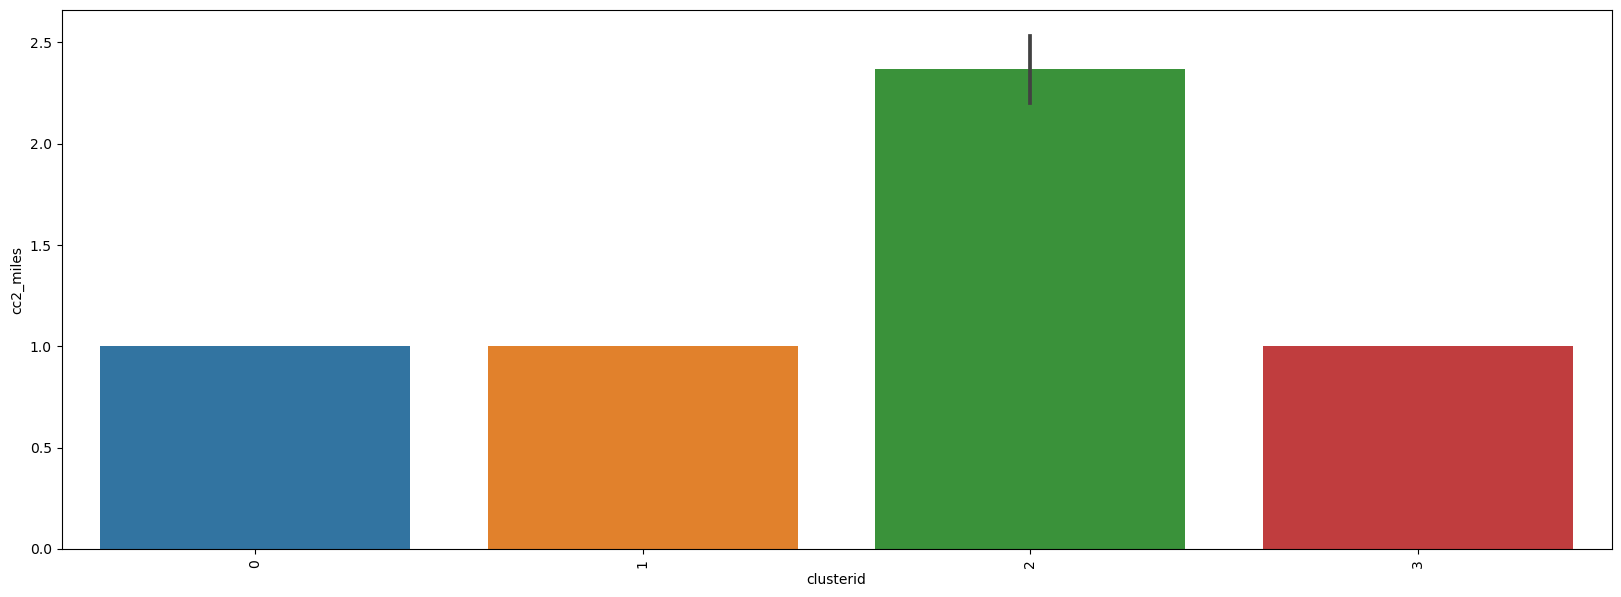

In [108]:
#plotting with frequent flyer with rewards earned by cred card and clusterid 
plt.figure(figsize=(20,7))
Balance = dataset7[['clusterid_new','cc2_miles']].sort_values ('cc2_miles',ascending = False)
ax =  sn.barplot(x = 'clusterid_new',y = 'cc2_miles',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'cc2_miles')
plt.xticks(rotation = 90)
plt.show()



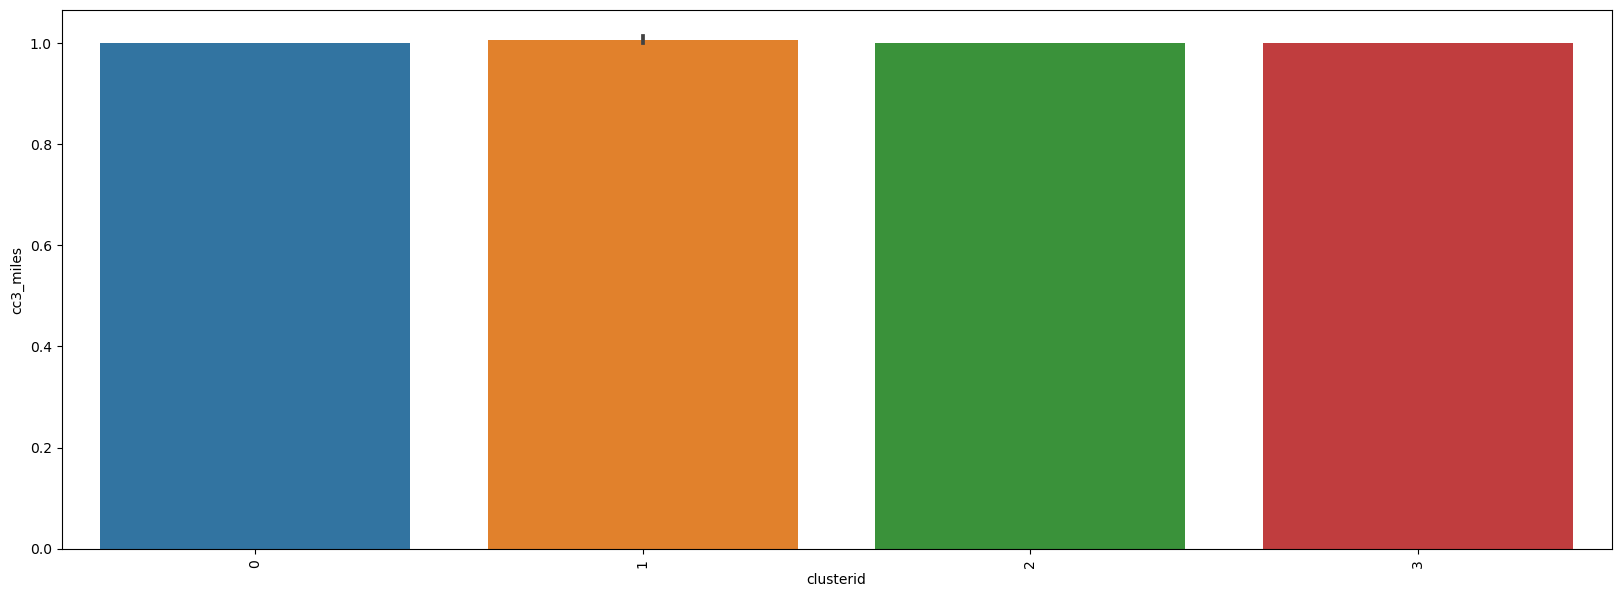

In [109]:
#plotting with  rewards earned by small buisness cred card and clusterid 
plt.figure(figsize=(20,7))
Balance = dataset7[['clusterid_new','cc3_miles']].sort_values ('cc3_miles',ascending = False)
ax =  sn.barplot(x = 'clusterid_new',y = 'cc3_miles',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'cc3_miles')
plt.xticks(rotation = 90)
plt.show()



# conclusion for kmeans 

#  KMeans is sensitive to outliers and has much impact after the outliers being treated .



# Hierarchial Clustering 


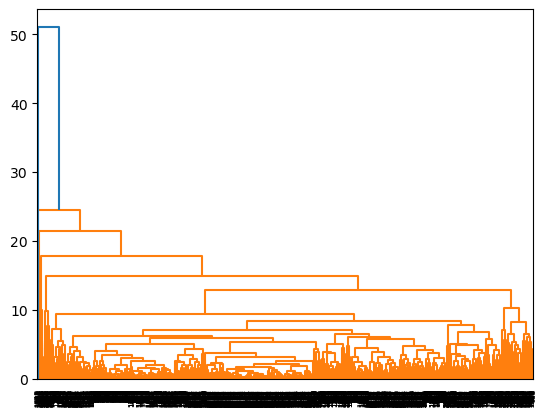

In [110]:
#plotting dendrogram for dataset
dng = sch.dendrogram(sch.linkage(dataset_norm, method = 'complete'))

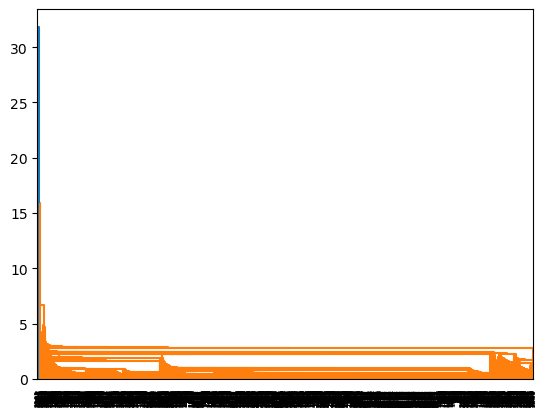

In [111]:
#plotting dendrogram for dataset
dng = sch.dendrogram(sch.linkage(dataset_norm, method = 'single'))

In [112]:
#create clusters
hc = AgglomerativeClustering(n_clusters = 4 ,affinity = 'euclidean',linkage = 'complete')

In [113]:
#prediction
hc.fit(dataset_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [114]:
y_hc = hc.fit_predict(dataset_norm)

In [115]:
clusters = pd.DataFrame(y_hc,columns = ['clusters'])
clusters.head()

,clusters
0,0
1,0
2,0
3,0
4,0


In [116]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
dataset7['h_clusterid'] = y_hc

In [118]:
dataset7.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0,0


# conclusion


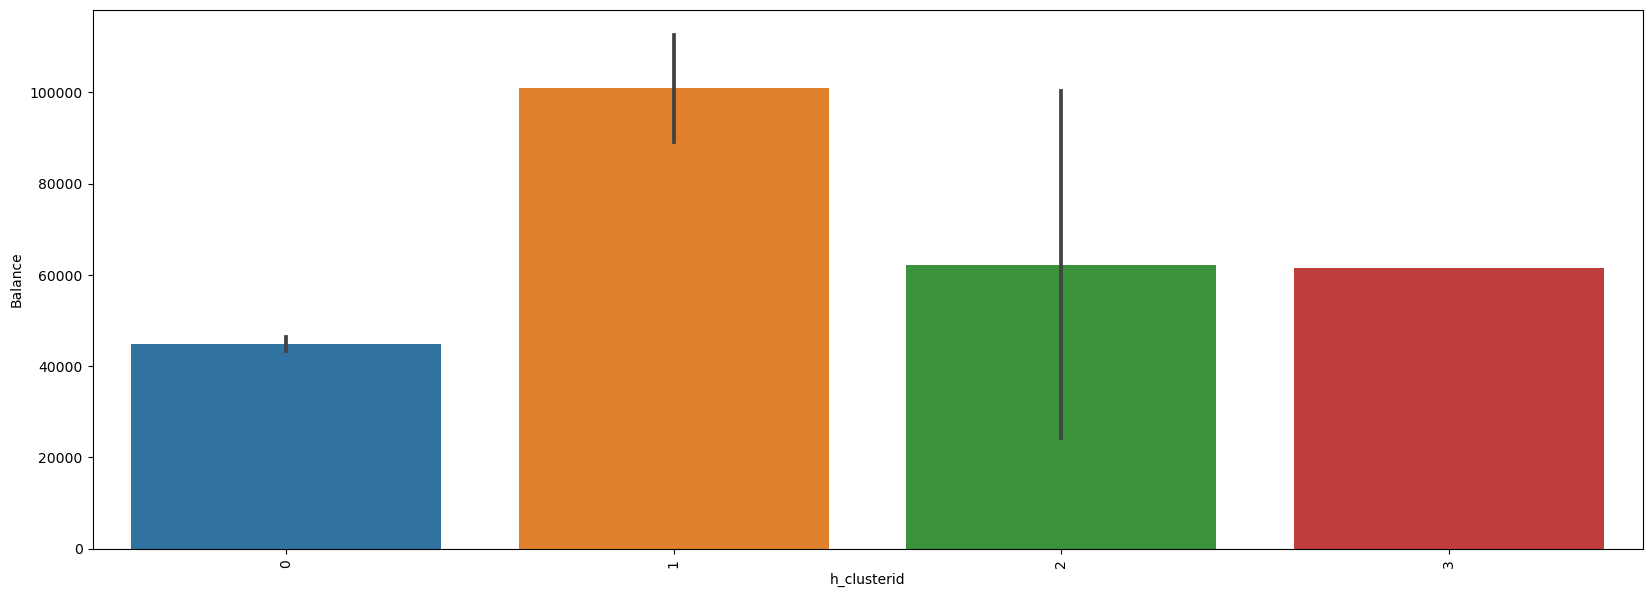

In [119]:
#plotting with no of miles eligible for free flight and agglomerative clusterid 
plt.figure(figsize=(20,7))
Balance = dataset7[['h_clusterid','Balance']].sort_values ('Balance',ascending = False)
ax =  sn.barplot(x = 'h_clusterid',y = 'Balance',data = Balance)
ax.set(xlabel = 'h_clusterid',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()



In [120]:
print("cluster labels for each point:",hc.labels_)
print("no of leaves in hierarchial tree:",hc.n_leaves_)
print("the estimated no of connected components in the graph:",hc.n_connected_components_)
print("the children on each non-leaf node:",hc.children_)
print("clustering score:",(silhouette_score(dataset_norm,hc.labels_)*100).round(3))


cluster labels for each point: [0 0 0 ... 0 0 0]
no of leaves in hierarchial tree: 2763
the estimated no of connected components in the graph: 1
the children on each non-leaf node: [[2258 2659]
 [ 738  818]
 [1825 2173]
 ...
 [5435 5521]
 [5505 5522]
 [1965 5523]]
clustering score: 73.931


# compared to KMeans we are having higher accuracy in hierarchial clustering

# DBScans

In [121]:
dataset8 = dataset7.drop(['clusterid_new','h_clusterid'],axis = 1)

In [122]:
stsscaler = StandardScaler()
X = stsscaler.fit_transform(dataset_norm2)

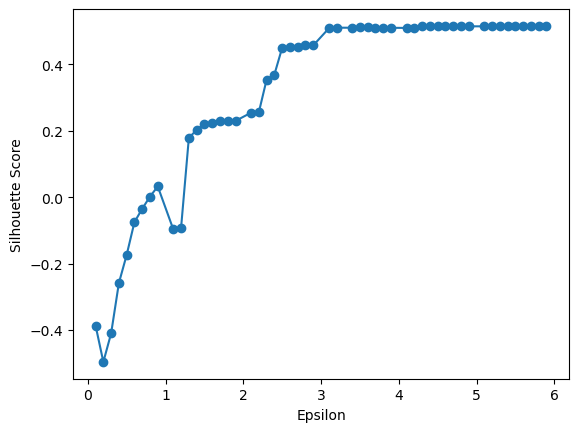

In [132]:
from sklearn.metrics import silhouette_score

eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6
             ,2.7,2.8,2.9,3.1,3.2,3.4,3.5,3.6,3.7,3.8,3.9,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.1,5.2
             ,5.3,5.4,5.5,5.6,5.7,5.8,5.9]
scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=2)
    dbscan.fit(X)
    labels = dbscan.labels_
    score = silhouette_score(X, labels)
    scores.append(score)

plt.plot(eps_values, scores, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()


In [124]:
dataset_norm2

array([[-0.4071123 , -0.13610177, -0.69799932, ..., -0.29235519,
         1.50604474, -0.60871645],
       [-0.62172941, -0.13610177, -0.69799932, ..., -0.29235519,
         1.49047092, -0.60871645],
       [-0.08850272, -0.13610177, -0.69799932, ..., -0.29235519,
         1.52259192, -0.60871645],
       ...,
       [ 0.46693573, -0.13610177, -0.69799932, ..., -0.29235519,
        -1.2218072 ,  1.64280102],
       [ 0.68910146, -0.13610177,  1.12312638, ..., -0.29235519,
        -1.21840042,  1.64280102],
       [-1.01309996, -0.13610177, -0.69799932, ..., -0.29235519,
        -1.22034715, -0.60871645]])

In [125]:
dbscan = DBSCAN(eps = 6, min_samples=22)
dbscan.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
#setting our labels into dataframe and wherever we have -1 it indicates we have noisy samples
cl = pd.DataFrame(dbscan.labels_,columns = ['clusterid'])
cl

,clusterid
0,0
1,0
2,0
3,0
4,0
...,...
2758,0
2759,0
2760,0
2761,0


In [128]:
dataset8['cl'] = dbscan.labels_
dataset8

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cl
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [129]:
# total number of noisy samples 
dataset8[dataset8['cl']== -1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cl
198,8669,0,1,3,1,11397,16,0,0,7486,1,-1
226,117329,0,1,2,1,6448,11,0,0,7416,1,-1
343,112501,0,1,1,2,19140,11,0,0,7101,0,-1
381,167670,0,1,3,1,15907,13,0,0,6994,0,-1
392,11189,0,1,2,1,9044,20,0,0,8296,1,-1
794,55610,0,1,2,1,5095,13,0,0,6151,0,-1
1149,84856,0,1,2,1,6894,13,0,0,5547,0,-1
1177,32214,11148,3,1,1,12717,10,0,0,5576,1,-1
1270,16103,0,1,3,1,10819,13,0,0,5427,0,-1
1337,128664,8019,4,1,1,44298,16,50,1,5155,1,-1


In [130]:
dataset8.groupby('cl').agg(['mean']).reset_index()

,cl,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,46948.805556,812.250000,1.222222,2.138889,1.138889,13800.194444,13.833333,22.222222,0.166667,3998.305556,0.250000
1,0,44998.310964,73.646865,1.773744,1.000000,1.000000,10067.346168,9.210488,18.882288,0.127613,3904.258893,0.270627


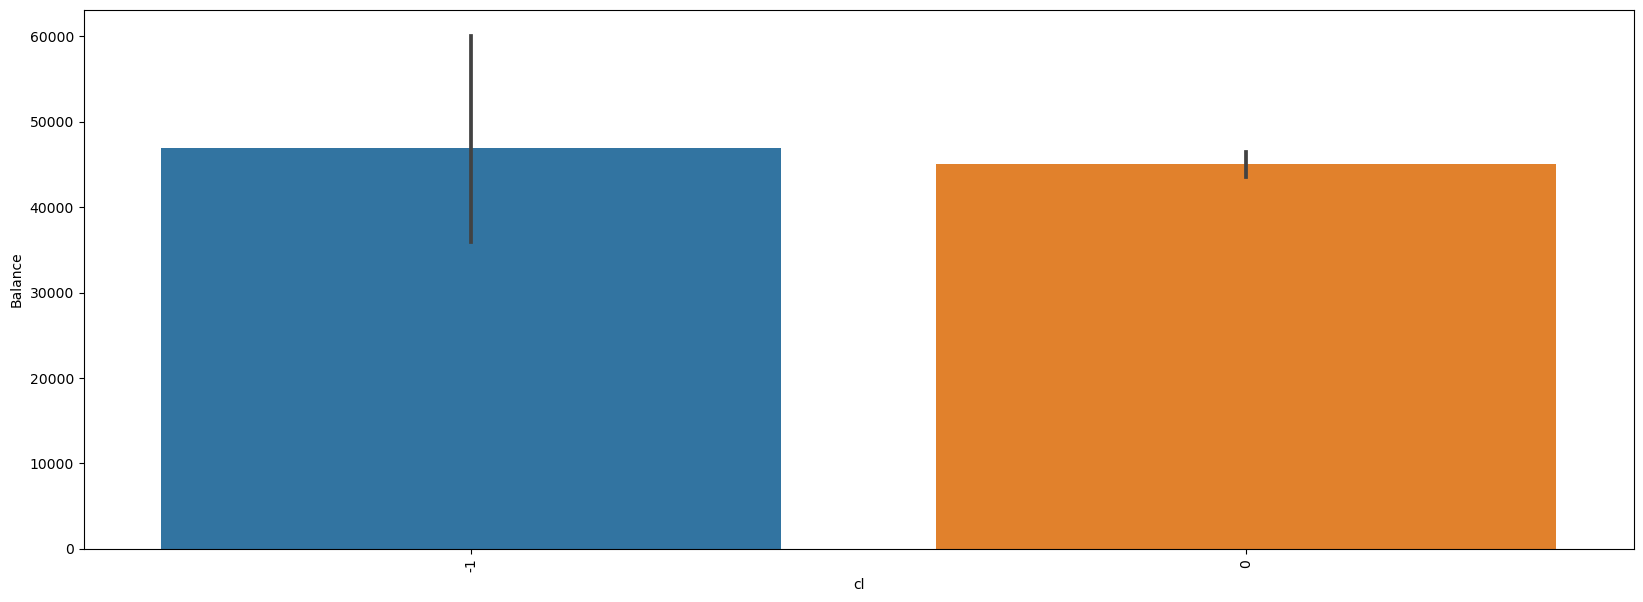

In [131]:
#plotting with frequent flyers and non frequent flyers
plt.figure(figsize=(20,7))
Balance = dataset8[['cl','Balance']].sort_values ('Balance',ascending = False)
ax =  sn.barplot(x = 'cl',y = 'Balance',data = Balance)
ax.set(xlabel = 'cl',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()



# final Conclusion considering kmeans as it is our generalised model

# 1) cluster 1 shows us that are newer passengers and have much lower number of miles travelled compared to cluster 2, and lowest number of miles with frequent flyer card 

# 2) cluster 2 shows us that usage of flights have been used frequently by the frequent flyer card and also have earned more number of miles .this cluster also shows us that the passengers are from upper class

# 3) cluster 3 shows us that rewards earned on credit cards higher but usage of flights have been less and even engagement in the program is lesser compared to other clusters

# 4) cluster 4 shows that they are frequent flyers but compared to cluster 1 the usage of flights is more in cluster 4 , this shows us that  domestic flights are used often than topflights
